In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 15
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["lines.linewidth"] = 1

In [2]:
da = 1e-6
data = {
    230: [756, 1150, 0],
    235: [668, 1088, 0],
    240: [688, 996, 0],
    245: [685, 1004, 0],
    225: [7707, 12262, 20],
    250: [670, 917, 0],
    255: [689, 890, 0],
    260: [706, 855, 0],
    220: [1210, 1679, 8],
    215: [527, 1182, 1],
    210: [453, 997, 0],
    205: [575, 1009, 0],
    221: [3554, 18033, 19],
    222: [13697, 22422, 108],
    223: [18046, 22712, 132],
    224: [18109, 20145, 102],
    225 + da: [11723, 16059, 59],
    226: [1882, 2509, 2],
    227: [863, 1270, 1],
    228: [724, 1078, 0],
    229: [631, 995, 0],
    230 + da: [632, 1007, 0],
    225 + 5 / 25: [7809, 12240, 36],
    225 + 10 / 25: [556, 9152, 0],
    225 + 15 / 25: [4288, 661, 8],
    225 + 20 / 25: [3201, 4816, 4],
    226 + da: [2495, 3356, 4],
    222 + da: [11630, 21960, 76],
    222 + 5 / 25: [12604, 22225, 86],
    222 + 10 / 25: [14471, 22307, 92],
    222 + 15 / 25: [15592, 22504, 102],
    222 + 20 / 25: [17036, 22634, 117],
    223 + da: [18093, 22613, 120],
    223 + 5 / 25: [18869, 22245, 123],
    223 + 10 / 25: [18029, 27022, 130],
    223 + 15 / 25: [19261, 21196, 116],
    223 + 20 / 25: [19169, 21140, 130],
    224 + da: [18610, 20200, 108],
    224 + 5 / 25: [18240, 20130, 97],
    224 + 10 / 25: [17608, 19568, 103],
    224 + 15 / 25: [16069, 19836, 89],
    224 + 20 / 25: [14282, 17641, 88],
    225 + da * da: [10910, 15588, 38],
}

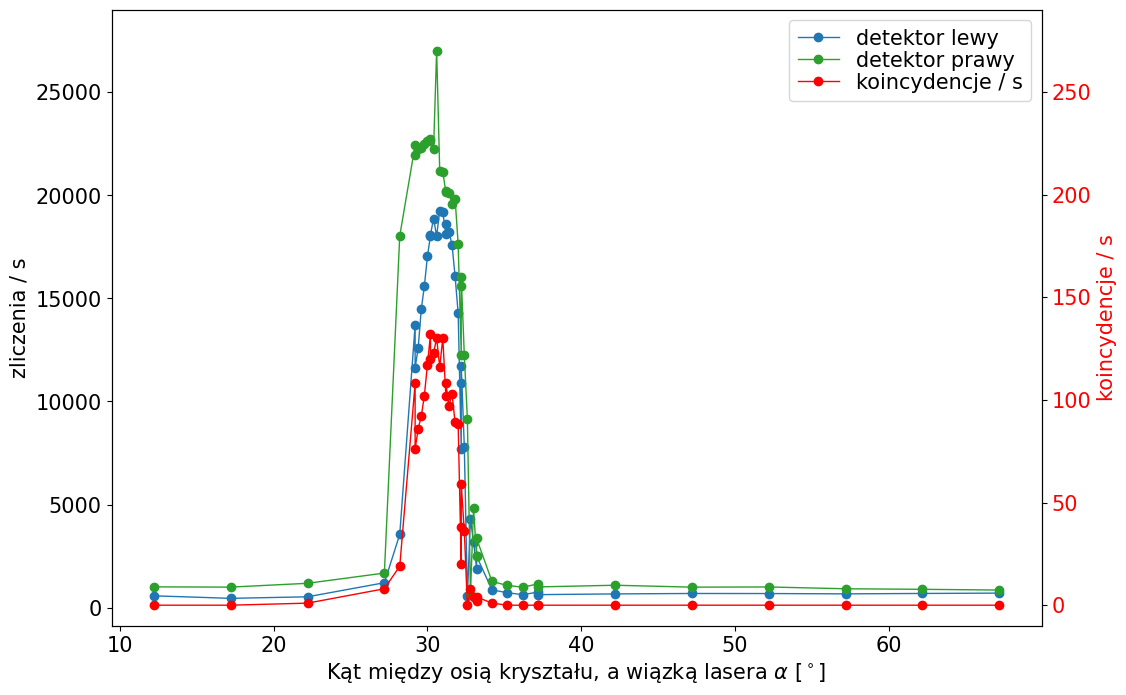

In [3]:
alphaZero = 230 - 8 - 29.2
ax1 = plt.gca()
X = sorted(data)

Y = [data[k][0] for k in X]
plt.plot(np.array(X) - alphaZero, Y, label="detektor lewy", marker="o")  # dolny dalej

Y = [data[k][1] for k in X]
plt.plot([], [])
plt.plot(np.array(X) - alphaZero, Y, label="detektor prawy", marker="o")  # górny bliżej

maxi = 30
# plt.xlim(-30, 30)
plt.ylim(ax1.get_ylim()[0], 29e3)

plt.xlabel("Kąt między osią kryształu, a wiązką lasera $\\alpha~[^\circ]$")
plt.ylabel("zliczenia / s")
lines, labels = ax1.get_legend_handles_labels()

ax2 = plt.twinx()
Y = [data[k][2] for k in X]
ax2.plot(np.array(X) - alphaZero, Y, label="koincydencje / s", color="red", marker="o")

ax2.set_ylabel("koincydencje / s", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ylim1, ylim2 = plt.ylim()
ax2.set_ylim(-10, 290)
# ax2.plot([maxi, maxi], [-3000, 30e3], "r:")

lines1, labels1 = ax2.get_legend_handles_labels()
plt.legend(lines + lines1, labels + labels1)

plt.savefig("NvsAngle.png", bbox_inches="tight")

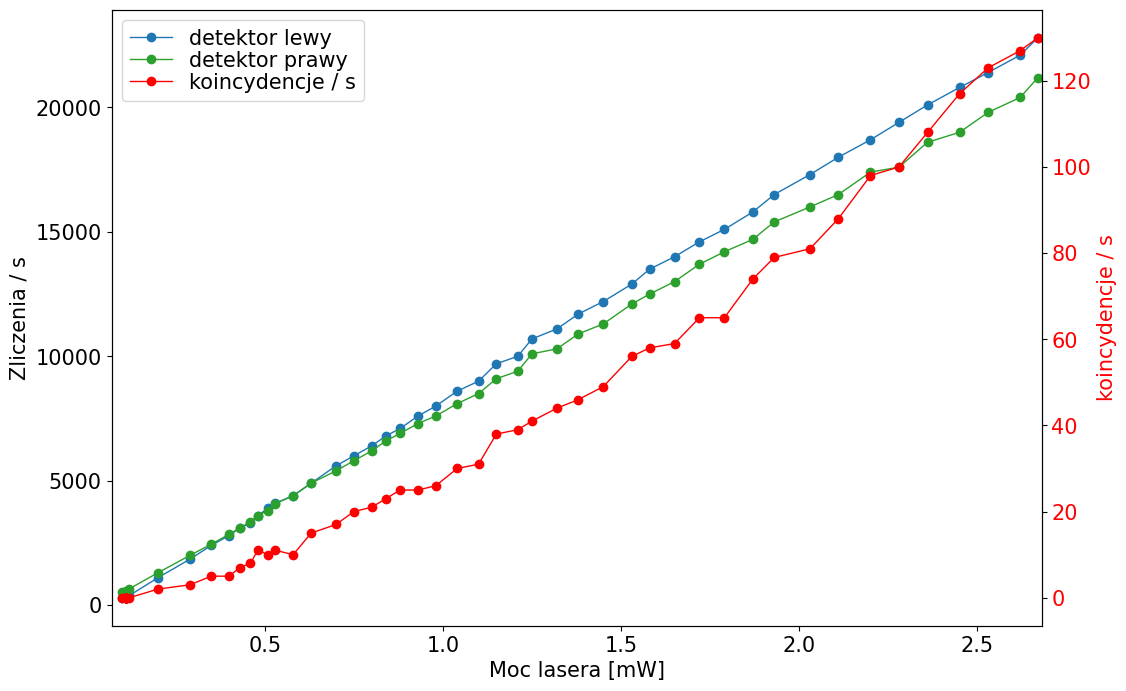

In [4]:
dataPowIntN = np.loadtxt("IntvsPowvsN.csv", skiprows=1, delimiter=";")
# INT;POW[mW];Nl;Np;NC

power = dataPowIntN[:, 1]

plt.plot(power, dataPowIntN[:, 2], label="detektor lewy", marker="o")
plt.plot([], [])
plt.plot(power, dataPowIntN[:, 3], label="detektor prawy", marker="o")
plt.plot([], [])
# plt.plot(power, dataPowIntN[:, 0] * 1000, label="Laser int. $\\times 1000$", marker="o")

maxi = 223 + 15 / 25
# plt.plot([maxi, maxi], [-100, 30e3], 25e3, color="green")

plt.xlim(0.07, max(power) + 0.01)
ax1 = plt.gca()
lines, labels = ax1.get_legend_handles_labels()
plt.xlabel("Moc lasera [mW]")
plt.ylabel("Zliczenia / s")

ax2 = plt.twinx()
ax2.plot(power, dataPowIntN[:, 4], label="koincydencje / s", color="red", marker="o")

ax2.set_ylabel("koincydencje / s", color="red")
ax2.tick_params(axis="y", labelcolor="red")

lines1, labels1 = ax2.get_legend_handles_labels()
plt.legend(lines + lines1, labels + labels1)

plt.savefig("NvsPower.png", bbox_inches="tight")

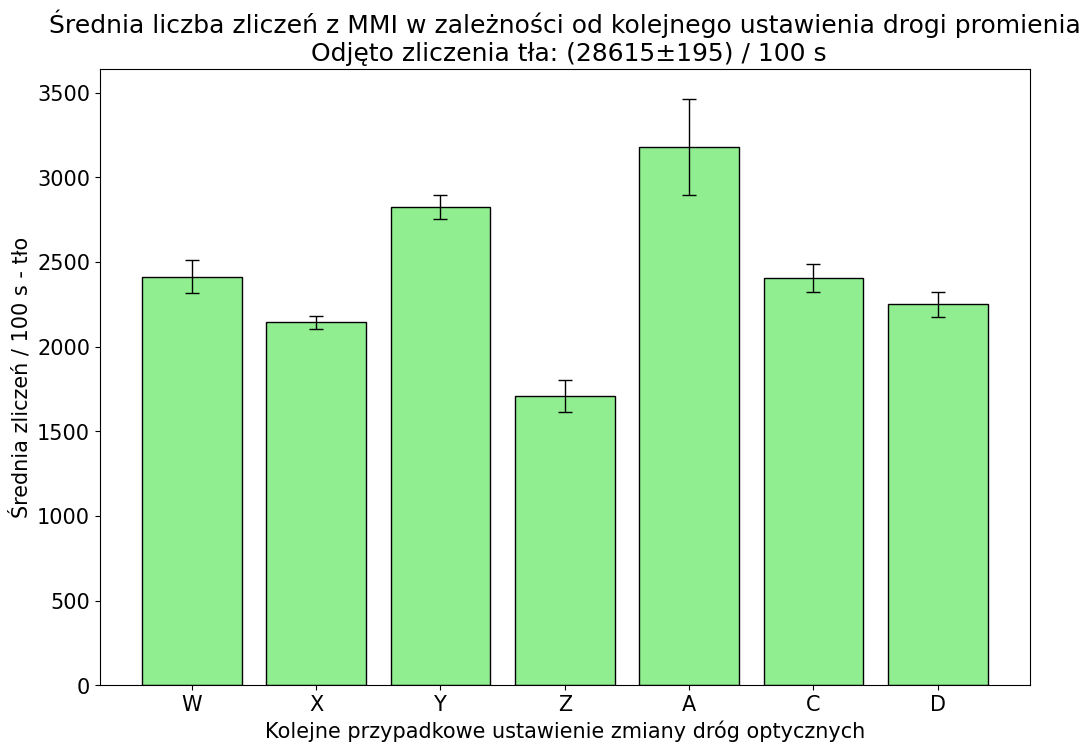

In [10]:
bckgrnd = np.array([287.78, 287.84, 283.61, 286.52, 286.64, 283.38, 284.99, 288.43])
background = np.mean(bckgrnd)

dataInterf = {
    "W": [311.74, 310.63, 308.45],
    "X": [306.96, 308.5, 307.0, 307.9],
    "Y": [315, 316, 311.1, 314.8, 314.5, 315],
    "Z": [301.9, 302.7, 305.1],
    "A": [315.1, 320.8],
    "C": [309.96, 308.38, 313.38, 311.68, 309.28, 308.50],
    "D": [307.99, 310.15, 307.82],
}

plt.bar(
    dataInterf.keys(),
    [100 * (np.mean(np.array(dataInterf[k]) - background)) for k in dataInterf.keys()],
    yerr=[
        100 * (st.stdev(dataInterf[k] - background) / np.sqrt(len(dataInterf[k])))
        for k in dataInterf.keys()
    ],
    capsize=5,
    color="lightgreen",
    edgecolor="black",
)

# Add labels and title
plt.xlabel("Kolejne przypadkowe ustawienie zmiany dróg optycznych")
plt.ylabel("Średnia zliczeń / 100 s - tło")
plt.title(
    "Średnia liczba zliczeń z MMI w zależności od kolejnego ustawienia drogi promienia\n Odjęto zliczenia tła: ("
    + str(int(round(((background * 100)), 0)))
    + "±"
    + str(int(round(st.stdev(bckgrnd * 100), 0)))
    + ") / 100 s"
)

# Show plot
plt.show()

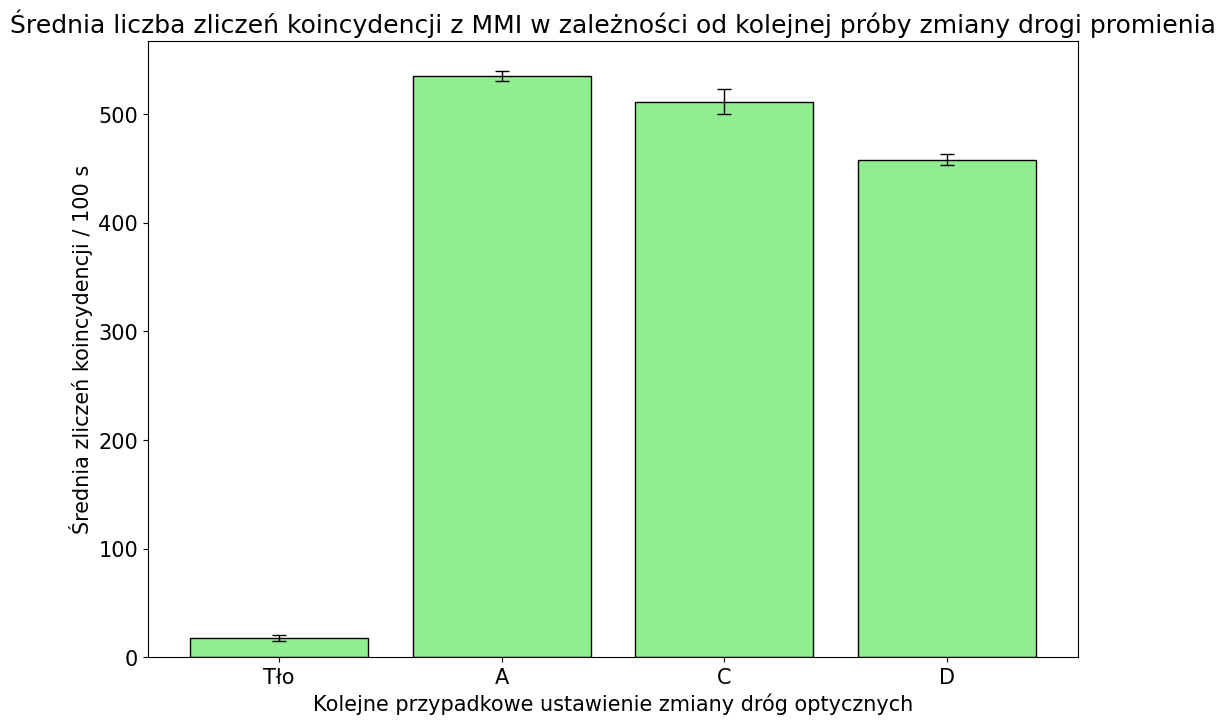

In [7]:
dataInterf2 = {
    "Tło": [0.22, 0.11, 0.24, 0.14],
    "A": [5.3, 5.4],
    # "B": [4.4, 4.5],
    "C": [5.6, 4.7, 5.12, 5.19, 5.04, 5.04],
    "D": [4.63, 4.53],
}

plt.bar(
    dataInterf2.keys(),
    [(np.mean(np.array(dataInterf2[k]) * 100)) for k in dataInterf2.keys()],
    yerr=[(st.stdev(np.array(dataInterf2[k]) * 100))/np.sqrt(len(dataInterf2[k])) for k in dataInterf2.keys()],
    capsize=5,
    color="lightgreen",
    edgecolor="black",
)

# Add labels and title
plt.xlabel("Kolejne przypadkowe ustawienie zmiany dróg optycznych")
plt.ylabel("Średnia zliczeń koincydencji / 100 s")
plt.title(
    "Średnia liczba zliczeń koincydencji z MMI w zależności od kolejnej próby zmiany drogi promienia"
)

# Show plot
plt.show()

Text(0, 0.5, 'Koincydencje')

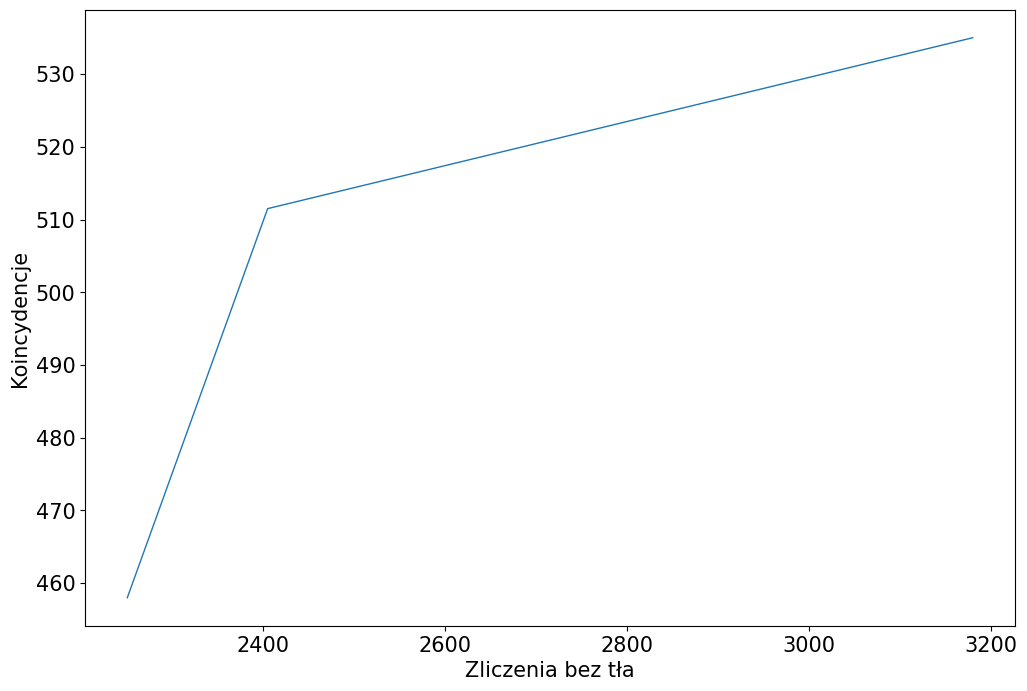

In [71]:
X = [dataInterf["A"], dataInterf["C"], dataInterf["D"]]
Y = [dataInterf2["A"], dataInterf2["C"], dataInterf2["D"]]

plt.plot(
    [100 * (np.mean(np.array(k) - background)) for k in X],
    [(np.mean(np.array(k) * 100)) for k in Y],
)
plt.xlabel("Zliczenia bez tła")
plt.ylabel("Koincydencje")